In [ ]:
import os
import pyarrow.parquet as pq
import pandas as pd

def read_parquet_files(folder_path):
    file_list = []
    
    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        file_data = pq.read_table(file_path).to_pandas()
        file_data['channel_id'] = file_name

        # Read Parquet file and append to the list
        file_list.append(file_data)

    # Concatenate all dataframes into a single dataframe
    df = pd.concat(file_list, ignore_index=True)
    
    return df

# Specify the folder path where your Parquet files are located
folder_path = "/Users/alexanderberndt/filtered_data"

# Read all Parquet files and collect them into a dataframe
dataframe = read_parquet_files(folder_path)

# display(dataframe)

In [24]:
number_of_videos = dataframe["video_id"].nunique()
number_of_channels = len(os.listdir(folder_path))
number_of_comments = len(dataframe)
avg_number_comments_per_user = dataframe.groupby('author_channel_id')['comment_id'].count().mean()

# Convert 'published_at' column to datetime
dataframe['published_at'] = pd.to_datetime(dataframe['published_at'])

# Group the data by 'author_channel_id'
grouped_data = dataframe.groupby(['author_channel_id', 'channel_id'])

# Calculate the time difference between the first and last comment for each user
time_diff = grouped_data['published_at'].max() - grouped_data['published_at'].min()

# Convert time difference to days
time_diff_days = time_diff.dt.days

# Calculate the average duration
average_duration = time_diff_days.mean()

print("average duration: ", average_duration)
print("average number of comments: ", avg_number_comments_per_user)
print("number of comments: ", number_of_comments)
print("number of channels: ", number_of_channels)
print("number of videos: ", number_of_videos)

average duration:  452.8622283217567
average number of comments:  7.998032057498146
number of comments:  280427
number of channels:  13
number of videos:  2265


In [ ]:
avg_number_comments_per_user = dataframe.groupby('author_channel_id')['comment_id'].count()
print(avg_number_comments_per_user)

print(time_diff_days.max())
print(time_diff_days.min())

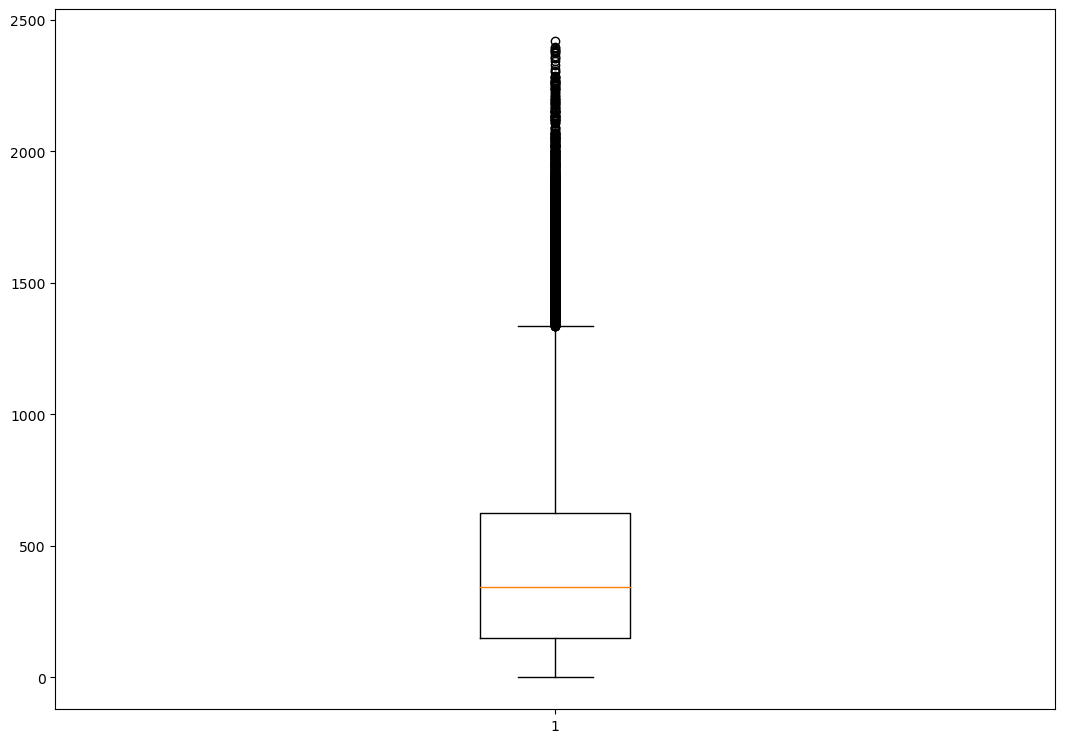

In [16]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(time_diff_days)
 
# show plot
plt.show()